In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
comments_df = pd.read_csv("D:\Shiva\CSE Courses\ML in Python\Youtube\comments.csv", error_bad_lines = False)
comments_df.head(10)

b'Skipping line 113225: expected 4 fields, saw 5\n'
b'Skipping line 158379: expected 4 fields, saw 7\nSkipping line 241590: expected 4 fields, saw 5\nSkipping line 245637: expected 4 fields, saw 7\n'
b'Skipping line 521402: expected 4 fields, saw 5\n'


,video_id,comment_text,likes,replies
0,jt2OHQh0HoQ,It's more accurate to call it the M+ (1000) be...,0,0
1,jt2OHQh0HoQ,To be there with a samsung phone\n😂😂😂,1,0
2,jt2OHQh0HoQ,"Thank gosh, a place I can watch it without hav...",0,0
3,jt2OHQh0HoQ,What happened to the home button on the iPhone...,0,0
4,jt2OHQh0HoQ,Power is the disease. Care is the cure. Keep...,0,0
5,jt2OHQh0HoQ,Keep calm and buy iphone 8 Keep calm and buy i...,0,0
6,jt2OHQh0HoQ,i am a big fan of youtube and u !!!!!!!!!!!!!,0,0
7,jt2OHQh0HoQ,You will never find Losers who line up and pay...,0,0
8,jt2OHQh0HoQ,*APPLE JUST COMMENTED ON MY LAST VIDEO* I'm cr...,0,0
9,jt2OHQh0HoQ,"I'm only here to see Emma, I love her so much!...",0,0


In [19]:
from textblob import TextBlob
TextBlob("It's more accurate to call it the M+ (1000) be...").sentiment.polarity
# checking the sentiment polarity of first comment

0.45000000000000007

In [20]:
#finding the missing data
comments_df.isna().sum()

video_id         0
comment_text    28
likes            0
replies          0
dtype: int64

In [21]:
#dropping all missing values
comments_df.dropna(inplace = True)

In [30]:
!pip install textblob

In [22]:
polarity = []
for i in comments_df["comment_text"]:
    polarity.append(TextBlob(i).sentiment.polarity)

In [23]:
comments_df["polarity"] = polarity
comments_df.head(10)

,video_id,comment_text,likes,replies,polarity
0,jt2OHQh0HoQ,It's more accurate to call it the M+ (1000) be...,0,0,0.450000
1,jt2OHQh0HoQ,To be there with a samsung phone\n😂😂😂,1,0,0.000000
2,jt2OHQh0HoQ,"Thank gosh, a place I can watch it without hav...",0,0,0.000000
3,jt2OHQh0HoQ,What happened to the home button on the iPhone...,0,0,0.000000
4,jt2OHQh0HoQ,Power is the disease. Care is the cure. Keep...,0,0,1.000000
5,jt2OHQh0HoQ,Keep calm and buy iphone 8 Keep calm and buy i...,0,0,0.300000
6,jt2OHQh0HoQ,i am a big fan of youtube and u !!!!!!!!!!!!!,0,0,0.000000
7,jt2OHQh0HoQ,You will never find Losers who line up and pay...,0,0,-0.100000
8,jt2OHQh0HoQ,*APPLE JUST COMMENTED ON MY LAST VIDEO* I'm cr...,0,0,0.028571
9,jt2OHQh0HoQ,"I'm only here to see Emma, I love her so much!...",0,0,0.500000


In [27]:
#filtering out the positive comments and storing it in dataframe called positive_comments
positive_comments = comments_df[comments_df['polarity'] == 1]
#seeing the shape of dataframe
positive_comments.shape

(20400, 5)

In [28]:
positive_comments.head(10)

,video_id,comment_text,likes,replies,polarity
4,jt2OHQh0HoQ,Power is the disease. Care is the cure. Keep...,0,0,1.0
26,jt2OHQh0HoQ,The best thing to ever happen to iPhone,0,2,1.0
80,jt2OHQh0HoQ,Apple is always awesome \n\nhttps://youtu.be/r...,0,1,1.0
158,YPVcg45W0z4,das a lot of edditing you have done there ... ...,0,0,1.0
175,YPVcg45W0z4,Welcome to the Scandiworld!,0,0,1.0
202,T_PuZBdT2iM,Power is the disease. Care is the cure. Keep...,0,0,1.0
206,T_PuZBdT2iM,WHY DO I KEEP FREAKING LAUGHING EACH TIME I WA...,0,0,1.0
237,T_PuZBdT2iM,LIKE = MEET CELEBRITY \nSUBSCRIBE = BECOME A B...,0,0,1.0
243,T_PuZBdT2iM,the sonic air timer was perfect,0,0,1.0
283,T_PuZBdT2iM,no 16 on trending impressive,1,0,1.0


In [29]:
!pip install wordcloud

In [33]:
from wordcloud import WordCloud, STOPWORDS
#saving the stopwords (words that will be eliminated) in a set
stopwords = set(STOPWORDS)

In [35]:
all_positive_comments = ' '.join(positive_comments['comment_text'])
all_positive_comments

"Power is the disease.\xa0 Care is the cure.\xa0 Keep caring for yourself and others as best as you can.\xa0 This is life. The best thing to ever happen to iPhone Apple is always awesome \\n\\nhttps://youtu.be/rftzm6X1yP4 das a lot of edditing you have done there ... I like it :D Welcome to the Scandiworld! Power is the disease.\xa0 Care is the cure.\xa0 Keep caring for yourself and others as best as you can.\xa0 This is life. WHY DO I KEEP FREAKING LAUGHING EACH TIME I WATCH IT AGAIN ! even though I know how it will end. omg the best 😂 LIKE = MEET CELEBRITY \\nSUBSCRIBE = BECOME A BILLIONAIRE\\nSCROLL UP/DOWN = DEATH FOR YOU AND EVERYONE YOU LOVE!!!!!!!!!!!!!!!!!!!!!!!!!!!!! the sonic air timer was perfect no 16 on trending impressive My daughters name is lacey <3 I'm 17 and can proudly say Moon Dreamers was one of my favourite shows! if I could subscribe to Dude Perfect a million times I would You guys should make dude perfect sceets To be a dude perfect member it is so awesome .... 

In [37]:
#generating wordcloud and saving it
cloud = WordCloud(width=1000, height = 500, stopwords = stopwords).generate(all_positive_comments)

(-0.5, 999.5, 499.5, -0.5)

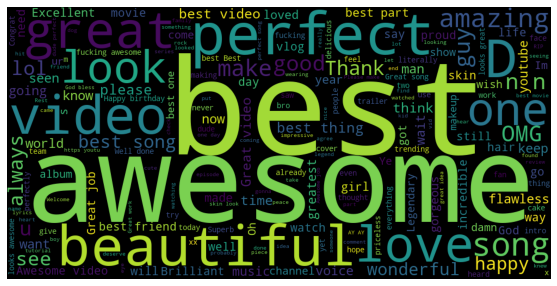

In [39]:
#visualization of wordcloud
plt.figure(figsize = (15,5))
plt.imshow(cloud)
plt.axis('off')

(-0.5, 2999.5, 1999.5, -0.5)

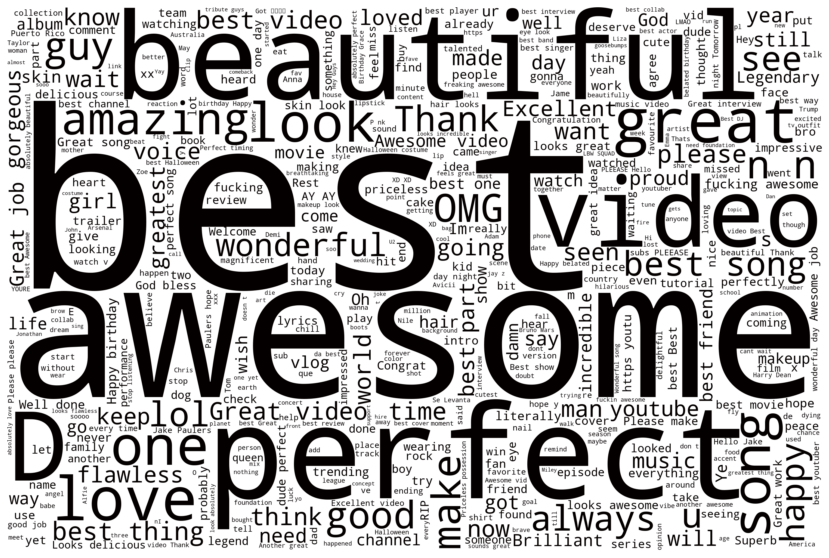

In [48]:
# change the value to black
def black_color_func(word, font_size, position,orientation,random_state=None, **kwargs):
    return("hsl(0,100%, 1%)")
# set the wordcloud background color to white
# set max_words to  500 and set width and height to higher quality, 3000 x 2000
cloud = WordCloud(background_color="white", width=3000, height=2000, max_words=500).generate(all_positive_comments)
cloud.recolor(color_func = black_color_func) #set the word color to black
plt.figure(figsize=[15,10])# set the figsize
plt.imshow(cloud, interpolation="bilinear")# plot the wordcloud
plt.axis("off")# remove plot axes

In [49]:
#filtering out the negative comments and storing it in a dataframe called negative_comments
negative_comments = comments_df[comments_df['polarity'] == -1]
#seeing the shape of dataframe
negative_comments.shape

(3339, 5)

In [50]:
negative_comments.head(10)

,video_id,comment_text,likes,replies,polarity
1387,ql0Op1VcELw,boring,0,0,-1.0
1394,ql0Op1VcELw,0:22 **laughs at terrible pun**,1,1,-1.0
1530,-Ifnaxi2LQg,this is the worst thing i've heard. ever.,0,0,-1.0
1745,F2uJvwiSZAQ,People making jokes about 9/11 is truly disgus...,1,0,-1.0
1793,F2uJvwiSZAQ,Thats insane.,0,0,-1.0
1873,a7Sf_H2cFdM,How is this trending ? Awful,0,0,-1.0
2377,7wGDvthZ0ng,"Butthurt Sean, idiot!",0,0,-1.0
2383,7wGDvthZ0ng,Nigga nigga nigga ni... Fucking.... Nigga!!!!!!!!,0,0,-1.0
2561,TeSoGKTZQl8,Just gone and bought these bad boys!!!! ❤️❤️❤️...,0,0,-1.0
2710,GpAuCG6iUcA,"Please let this die, you can tell the actors a...",0,0,-1.0


In [51]:
all_negative_comments = ' '.join(negative_comments['comment_text'])
all_negative_comments

"boring 0:22   **laughs at terrible pun** this is the worst thing i've heard. ever. People making jokes about 9/11 is truly disgusting. Hundreds of people died for God's sake - have some respect. Thats insane. How is this trending ? Awful Butthurt Sean, idiot! Nigga nigga nigga ni... Fucking.... Nigga!!!!!!!! Just gone and bought these bad boys!!!! ❤️❤️❤️❤️ had an alarm set in my phone and everything Please let this die, you can tell the actors are miserable. can't wait :'( Don't be bringing cucumbers to the theaters this time!! You know who you are, ya nasty Handmaids Tale was boring, I found I won't read this comment. What a Dick I am, I can't believe I just read this. I am pathetic! all the products are horrible jim carrey lost it, became a boring socialist hippy Winner Tacos were my favourite growing up too! People always thought I was insane when I described it amd kept on claiming that I was just misremembering Maxibons. Terrible, at times like this we need to come together not s

In [52]:
#generating wordcloud and saving it
cloud = WordCloud(width=1000, height = 500, stopwords = stopwords).generate(all_negative_comments)

(-0.5, 999.5, 499.5, -0.5)

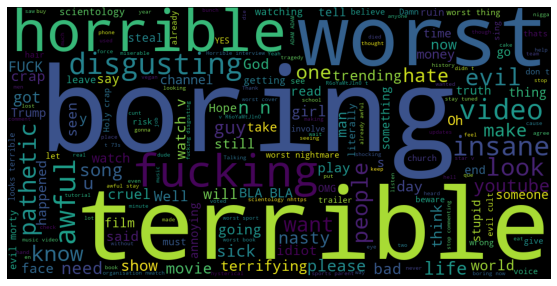

In [53]:
#visualization of wordcloud
plt.figure(figsize = (15,5))
plt.imshow(cloud)
plt.axis('off')

(-0.5, 2999.5, 1999.5, -0.5)

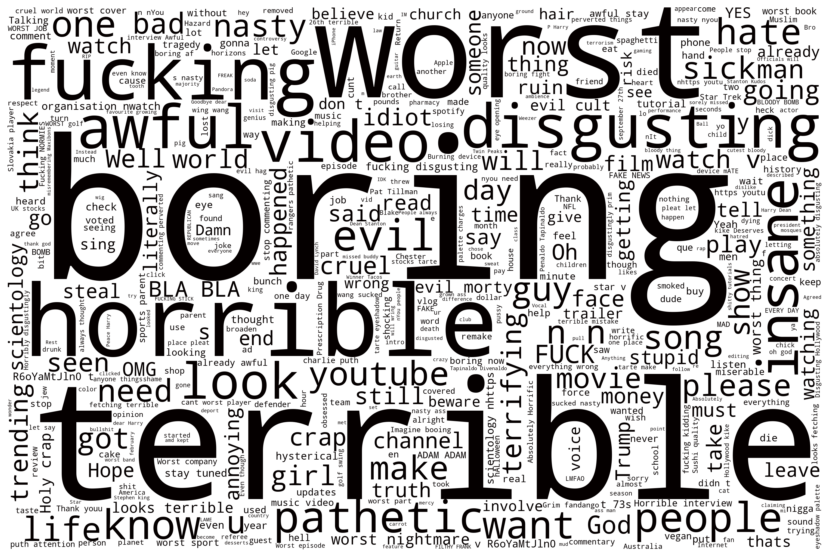

In [56]:
# set the wordcloud background color to white
# set max_words to  500 and set width and height to higher quality, 3000 x 2000
cloud = WordCloud(background_color="white", width=3000, height=2000, max_words=500).generate(all_negative_comments)
cloud.recolor(color_func = black_color_func) #set the word color to black
plt.figure(figsize=[15,10])
plt.imshow(cloud, interpolation="bilinear")# plot the wordcloud
plt.axis("off")# remove plot axes